<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/Planet_image_stacking_032024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")
install.packages("dplyr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpwZtyaA/remotes10270fbd0b1/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpwZtyaA/file10275417f61/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)
# library(gdalUtils)

drive_auth(use_oob = TRUE, cache = FALSE)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.app

Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQWdmRkgtOEZtbWU4Zmd1TUxaU2ZRX21Xd180N1VHUG9lMDlYT3JQMnlFc0lvQkJVLTMwVHVOdWFUUXptTkpwZyIsInN0YXRlIjoiYTVmYjVlMTczOTI2YjhhMDRmMjZmZWExYzRjYWIxZjIifQ==


In [5]:
dir.create("/content/imagery")
dir.create("/content/imagery/planet")
dir.create("/content/imagery/planet/dem")
dir.create("/content/imagery/planet/dem/utm5")

Warning message in dir.create("/content/imagery"):
“'/content/imagery' already exists”
Warning message in dir.create("/content/imagery/planet"):
“'/content/imagery/planet' already exists”
Warning message in dir.create("/content/imagery/planet/dem"):
“'/content/imagery/planet/dem' already exists”


In [7]:
dir.create("/content/imagery/planet/2018")
dir.create("/content/imagery/planet/2018/utm4")
dir.create("/content/imagery/planet/2018/utm5")

dir.create("/content/imagery/planet/2019")
dir.create("/content/imagery/planet/2019/utm4")
dir.create("/content/imagery/planet/2019/utm5")

dir.create("/content/imagery/planet/2020")
dir.create("/content/imagery/planet/2020/utm4")
dir.create("/content/imagery/planet/2020/utm5")

In [ ]:
# https://drive.google.com/drive/folders/1DRk7b6lKEtihFlg3XXXwmePwNlFIKlA7?usp=drive_link
# planet utm5 DEM

folder = "1DRk7b6lKEtihFlg3XXXwmePwNlFIKlA7"
folder_id = drive_get(as_id(folder))

files = drive_ls(folder_id)

for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/dem/utm5/', i_dir$name[1])
      )
    })
  }

In [ ]:
# https://drive.google.com/drive/folders/1P4-Y7sSdQiIDWda19uTHX0KaYsULcDUI?usp=drive_link
# planet utm5 2020

folder = "1P4-Y7sSdQiIDWda19uTHX0KaYsULcDUI"
folder_id = drive_get(as_id(folder))

files = drive_ls(folder_id)

for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2020/utm5/', i_dir$name[1])
      )
    })
  }

In [ ]:
# https://drive.google.com/drive/folders/1P6pqHrshe3k6kEvQpfRyPAgfAFQLUoeS?usp=drive_link
# planet utm5 2019

folder = "1P6pqHrshe3k6kEvQpfRyPAgfAFQLUoeS"
folder_id = drive_get(as_id(folder))

files = drive_ls(folder_id)

for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2019/utm5/', i_dir$name[1])
      )
    })
  }

In [11]:
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/nwi_utm4")
dir.create("/content/workingfolder/nwi_utm5")

dir.create("/content/workingfolder/aoi")
dir.create("/content/workingfolder/aoi/utm4")
dir.create("/content/workingfolder/aoi/utm5")

dir.create("/content/workingfolder/dem")
dir.create("/content/workingfolder/dem/utm4")
dir.create("/content/workingfolder/dem/utm5")

dir.create("/content/workingfolder/ccap")
dir.create("/content/workingfolder/ccap/utm4")
dir.create("/content/workingfolder/ccap/utm5")

dir.create("/content/workingfolder/nlcd")
dir.create("/content/workingfolder/nlcd/utm4")
dir.create("/content/workingfolder/nlcd/utm5")




In [27]:
# folder for another elevation model.
dir.create("/content/folder")
dir.create("/content/folder/new_elevation")

In [28]:
#
# https://drive.google.com/file/d/1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft/view?usp=drive_link
drive_download(file = as_id('1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft'), path =  '/content/folder/new_elevation/hi_dem.tif', overwrite = FALSE)


File downloaded:

• hawaii_10m.tif <id: 1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft>

Saved locally as:

• /content/folder/new_elevation/hi_dem.tif



In [12]:
cl <- makeCluster(8)
########################################################################## load NWI data

# load NUMERIC nwi data
# https://drive.google.com/file/d/1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S'), path =  '/content/workingfolder/nwi_utm4/nwi_utm4.gpkg', overwrite = FALSE)

# https://drive.google.com/file/d/1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 5 island = Hawaii)that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4'), path =  '/content/workingfolder/nwi_utm5/nwi_utm5.gpkg', overwrite = FALSE)




########################################################################## load AOI data

# https://drive.google.com/file/d/1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH/view?usp=drive_link
# This file is the area of interest vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH"),
path = "/content/workingfolder/aoi/utm4/aoi_utm4.gpkg", overwrite = FALSE)

# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link
# This file is the area of interest vector file (for utm 5 island = Hawaii) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc"),
path = "/content/workingfolder/aoi/utm5/aoi_utm5.gpkg", overwrite = FALSE)




########################################################################## load DEM data

# load the dem (for utm 4 islands = Kauai, Oahu, Molokai, Maui) it also will load the Hawaii dem
# https://drive.google.com/drive/folders/1URF4YPEnWirmyWjmueyIgiYchcORWe6q?usp=drive_link
jp_folder = "1URF4YPEnWirmyWjmueyIgiYchcORWe6q"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/dem/utm4/', i_dir$name[1])
      )
    })
  }




########################################################################## load CCAP data

# load the ccap (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# https://drive.google.com/drive/folders/14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv?usp=drive_link
jp_folder = "14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm4/', i_dir$name[1])
      )
    })
  }



# load the ccap (for utm 5 island = Hawaii) DONT use/need ccap_hawaii_03_nad83
# https://drive.google.com/drive/folders/1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW?usp=drive_link
jp_folder = "1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm5/', i_dir$name[1])
      )
    })
  }





########################################################################## load NLCD data

# load the nlcd, utm 4 (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# https://drive.google.com/file/d/17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC/view?usp=drive_link
drive_download(file = as_id('17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC'), path =  '/content/workingfolder/nlcd/utm4/nlcd_utm4.tif', overwrite = FALSE)

# load the nlcd, utm 5 (for utm 5 island = Hawaii)
# https://drive.google.com/file/d/1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr/view?usp=drive_link
drive_download(file = as_id('1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr'), path =  '/content/workingfolder/nlcd/utm5/nlcd_utm5.tif', overwrite = FALSE)

stopCluster(cl)

File downloaded:

• nwi_utm4_numeric.gpkg <id: 1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S>

Saved locally as:

• /content/workingfolder/nwi_utm4/nwi_utm4.gpkg

File downloaded:

• nwi_utm5_numeric.gpkg <id: 1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4>

Saved locally as:

• /content/workingfolder/nwi_utm5/nwi_utm5.gpkg

File downloaded:

• aoi_wetland_4.gpkg <id: 1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH>

Saved locally as:

• /content/workingfolder/aoi/utm4/aoi_utm4.gpkg

File downloaded:

• aoi_wetland_hawaii.gpkg <id: 1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc>

Saved locally as:

• /content/workingfolder/aoi/utm5/aoi_utm5.gpkg



# A dribble: 1 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 dem_wgs_84 1URF4YPEnWirmyWjmueyIgiYchcORWe6q <named list [34]>


File downloaded:

• wgs84_hawaii_dem.tif <id: 1GgimNhsSiLUY-6ttztqOmdcUn7nH6ryF>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_hawaii_dem.tif

File downloaded:

• wgs84_maui_dem.tif <id: 17NL9FjRrW8Osurqj6VFbnj7KQjJ1gg0L>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_maui_dem.tif

File downloaded:

• wgs84_molokai_dem.tif <id: 1A7N8UpmUn8Tq95ePGXQYdjLF5_TpcTwC>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_molokai_dem.tif

File downloaded:

• wgs84_oahu_dem.tif <id: 1AmtIltpD8KGRH53RzSIawJpVqvOP9OLz>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_oahu_dem.tif

File downloaded:

• wgs84_kauai_10m.tif <id: 1eu_7lpCjyl5WpgGq_HizUz8n4d1u35tC>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_kauai_10m.tif



# A dribble: 1 × 3
  name  id                                drive_resource   
  <chr> <drv_id>                          <list>           
1 ccap  14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv <named list [34]>
Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• kauai_ccap_2010.tif <id: 1-9SuvnH-Ck4CMaAXqDQTbbLGKtfMUnxn>

Saved locally as:

• /content/workingfolder/ccap/utm4/kauai_ccap_2010.tif

File downloaded:

• oahu_ccap_2010.tif <id: 1-5Q_qbss1zUnW1wcQlomRHehPemzy7HG>

Saved locally as:

• /content/workingfolder/ccap/utm4/oahu_ccap_2010.tif

File downloaded:

• molokai_ccap_2010.tif <id: 1-2M0JNgYiVMINDoW2mAiWLX3H9kYz_Z->

Saved locally as:

• /content/workingfolder/ccap/utm4/molokai_ccap_2010.tif

File downloaded:

• maui_ccap_2010.tif <id: 1--1nN7Gj_qx6iwPG8Jq5gZcGRA0uaOay>

Saved locally as:

• /content/workingfolder/ccap/utm4/maui_ccap_2010.tif



# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 ccap_hawaii 1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW <named list [34]>
Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• ccap_hawaii_03_nad83.tif <id: 1kzbf77OuzMinC90SpJVqMJ6fJpqWcJKf>

Saved locally as:

• /content/workingfolder/ccap/utm5/ccap_hawaii_03_nad83.tif

File downloaded:

• hawaii_ccap_2010_01.tif <id: 1WI2adKHfm5J-bfBnRN0N2n-bI45foz60>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif

File downloaded:

• hawaii_ccap_2010_03.tif <id: 1-KHspFGnfIwHcWFsNvwshfy3H-_Y5gVB>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif

File downloaded:

• hawaii_ccap_2010_02.tif <id: 10BnucV2NpjYekC-Lr-PddVYJ2XFXmNwo>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif

File downloaded:

• nad83_nlcd_hi_2001_split_4.tif <id: 17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC>

Saved locally as:

• /content/workingfolder/nlcd/utm4/nlcd_utm4.tif

File downloaded:

• nad83_nlcd_hi_2001_split_hawaii.tif <id: 1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr>

Saved locally as:

• /content/workingfolder/nlcd/utm5/nlcd_utm5.tif



In [13]:
# Load Planet 2018 utm5 select files
# https://drive.google.com/drive/folders/1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt?usp=drive_link
jp_folder = "1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2018/utm5/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name               id                                drive_resource   
  <chr>              <drv_id>                          <list>           
1 2018_select_hawaii 1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt <named list [34]>


File downloaded:

• 2018_select_hawaii_vrt.vrt <id: 1-JfGmfVUDRJlf7r4dcg564swzspaUTZU>

Saved locally as:

• /content/imagery/planet/2018/utm5/2018_select_hawaii_vrt.vrt

File downloaded:

• waipio_2018-01-09.tif <id: 1LeTKzEKgxeOk08iU12Z5KG9xdWYSO6-h>

Saved locally as:

• /content/imagery/planet/2018/utm5/waipio_2018-01-09.tif

File downloaded:

• waimanu_2018-03-15.tif <id: 1FA8LcH2odBWUXnyu_crGTvOAbBcLH3Y_>

Saved locally as:

• /content/imagery/planet/2018/utm5/waimanu_2018-03-15.tif

File downloaded:

• pololu_2018-01-10.tif <id: 1AoZ5gXaOJyoWxtnCuFzIP2___j3NBno0>

Saved locally as:

• /content/imagery/planet/2018/utm5/pololu_2018-01-10.tif

File downloaded:

• lokoaka_kionakapahu_2018-01-29.tif <id: 19U7YFEoeO_vl9JqIdw06C-3PStZlCa4T>

Saved locally as:

• /content/imagery/planet/2018/utm5/lokoaka_kionakapahu_2018-01-29.tif



# Data is loaded locally. Next, redo 2018 tiles for UTM 5

In [14]:
aoi_utm5 <- st_read("/content/workingfolder/aoi/utm5/aoi_utm5.gpkg")
aoi_utm5

Reading layer `aoi_wetland_hawaii' from data source 
  `/content/workingfolder/aoi/utm5/aoi_utm5.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 213311.3 ymin: 2182234 xmax: 288178.3 ymax: 2236783
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,layer,path,geom
<dbl>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,MULTIPOLYGON (((285757 2182...
1,pololu,E:/Data/AOI_Shapefiles/hawaii/pololu.shp,MULTIPOLYGON (((213311.3 22...
1,waimanu,E:/Data/AOI_Shapefiles/hawaii/waimanu.shp,MULTIPOLYGON (((223006.9 22...
1,waipio,E:/Data/AOI_Shapefiles/hawaii/waipio.shp,MULTIPOLYGON (((226466.1 22...


In [15]:
aoi_utm5_dt <-as.data.table(aoi_utm5)
aoi_utm5_dt[,island:= path %>% substr(24,100) %>% gsub('.shp','',.) %>% gsub(layer,'',.) %>% gsub('/','',.),by=1:nrow(aoi_utm5_dt)]
# aoi_utm5_dt[,name:= path %>% substr(29,100) %>% gsub('.shp','',.) %>% gsub('/','',.),by=1:nrow(aoi_utm5_dt)]
# aoi_utm5_dt[layer =="lumahai", id := 1]
# aoi_utm5_dt[, lumahai := NULL]
aoi_utm5_dt[id == "1", id := 1:4]
aoi_utm5 <- aoi_utm5_dt %>% st_as_sf

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,layer,path,island,geom
<dbl>,<chr>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,hawaii,MULTIPOLYGON (((285757 2182...
2,pololu,E:/Data/AOI_Shapefiles/hawaii/pololu.shp,hawaii,MULTIPOLYGON (((213311.3 22...
3,waimanu,E:/Data/AOI_Shapefiles/hawaii/waimanu.shp,hawaii,MULTIPOLYGON (((223006.9 22...
4,waipio,E:/Data/AOI_Shapefiles/hawaii/waipio.shp,hawaii,MULTIPOLYGON (((226466.1 22...


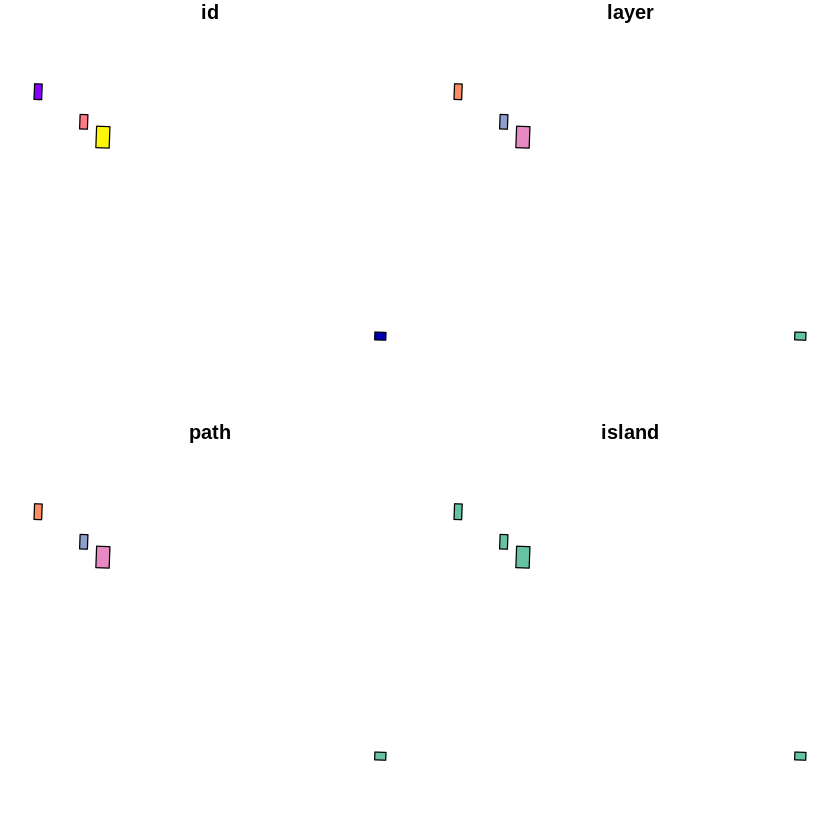

In [16]:
aoi_utm5
aoi_utm5 %>% plot

In [17]:
nlcd_utm5 <- raster("/content/workingfolder/nlcd/utm5/nlcd_utm5.tif")

In [18]:
nwi_utm5 <- st_read("/content/workingfolder/nwi_utm5/nwi_utm5.gpkg")
nwi_utm5

Reading layer `nwi_utm5_numeric' from data source 
  `/content/workingfolder/nwi_utm5/nwi_utm5.gpkg' using driver `GPKG'
Simple feature collection with 2105 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 173408.4 ymin: 2087445 xmax: 316047.8 ymax: 2249339
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,value,wetland_ty_numeric,geom
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,PUBHh,0.2609826,Freshwater Pond,1056.1591,121.4864,7,7,MULTIPOLYGON (((230022.7 21...
2,PUBHh,0.3178072,Freshwater Pond,1286.1200,129.4962,7,7,MULTIPOLYGON (((228629.6 21...
3,PUS3Ah,0.2185504,Freshwater Pond,884.4421,107.8919,7,7,MULTIPOLYGON (((226387.3 21...
4,PUS3Ah,0.4064771,Freshwater Pond,1644.9544,153.5977,7,7,MULTIPOLYGON (((225440.1 21...
5,PUS3Ch,0.2855907,Freshwater Pond,1155.7447,124.3542,7,7,MULTIPOLYGON (((226575.2 21...
6,PUS3Ch,0.4222651,Freshwater Pond,1708.8463,156.8640,7,7,MULTIPOLYGON (((228047.3 21...
7,PUS3Ch,0.1888957,Freshwater Pond,764.4338,99.7818,7,7,MULTIPOLYGON (((226417.9 21...
8,PUS3Ch,0.2335592,Freshwater Pond,945.1806,111.1221,7,7,MULTIPOLYGON (((225989.5 21...
9,PUS3Ch,0.2310241,Freshwater Pond,934.9212,111.1674,7,7,MULTIPOLYGON (((228259.3 21...


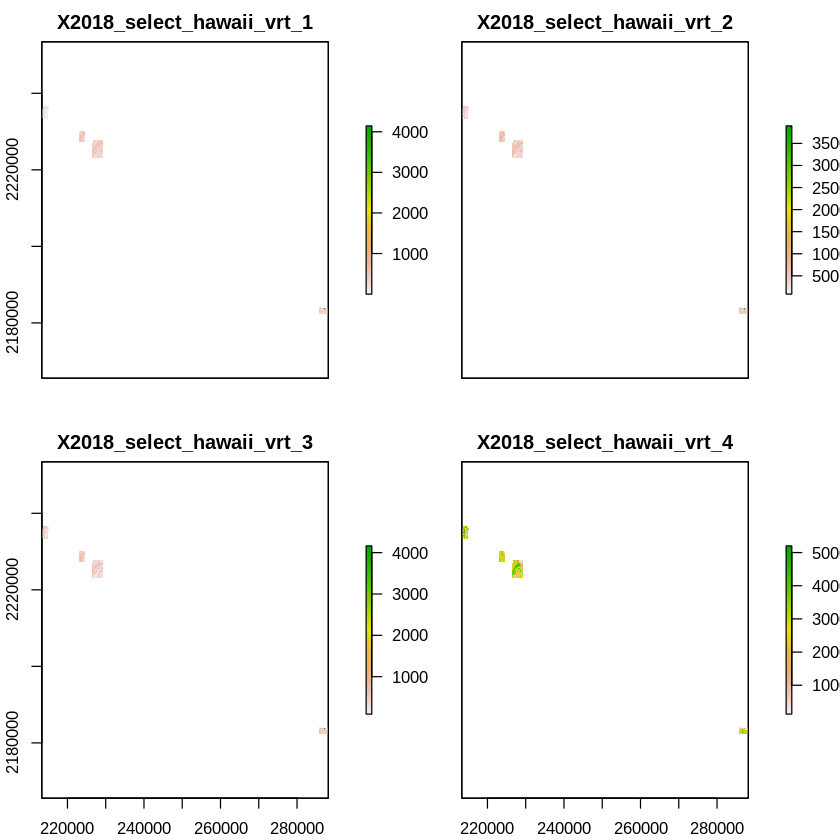

In [20]:
vrt_utm5_2018 <- stack("/content/imagery/planet/2018/utm5/2018_select_hawaii_vrt.vrt")
vrt_utm5_2018 %>% plot

In [21]:
unified_data_table <- data.table (unified = c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
nwi_data_table <- data.table (nwi = list(-1, c(1,2,3), 4, 5, 6, 7, -1, -1, -1, -1, -1, -1))
nlcd_data_table <- data.table(nlcd = list(-1, 11, 90, 95, -1, -1, c(21,22,23,24), c(81,82), 71, 31, c(41,42,43), 52))
ccap_labels_data_table <- data.table(ccap = list(c(0,1), c(19,21), c(16,17,18), c(13,15), 14, c(22,23), c(2,3,4,5), c(6,7), 8, 20, c(9,10,11), 12))

unified_data_table_all <- data.table (
  unified_data_table,
  nwi_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [22]:
ccap_path =c('/content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif',
'/content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif',
'/content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif')
ccap_path_data_table <- data.table (ccap_path)


island = c('hawaii')
island_data_table <- data.table (island)

dem_path =c('/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif',
'/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif',
'/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif')
dem_path_data_table <- data.table (dem_path)

linked_dt <- data.table (
  island_data_table,
  ccap_path_data_table,
  dem_path_data_table)

linked_dt$ccap_raster <- linked_dt$ccap_path %>% lapply(stack)
linked_dt$dem_raster <- linked_dt$dem_path %>% lapply(stack)

In [ ]:
linked_dt

In [40]:
# new linked data table with updated elevation model for hawaii island.

ccap_pathh =c('/content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif',
'/content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif',
'/content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif')
ccap_path_data_tablee <- data.table (ccap_pathh)


island = c('hawaii')
island_data_tablee <- data.table (island)

dem_pathh =c('/content/folder/new_elevation/hi_dem_projected.tif')
dem_path_data_tablee <- data.table (dem_pathh)

linked_dtt <- data.table (
  island_data_tablee,
  ccap_path_data_tablee,
  dem_path_data_tablee)

linked_dtt$ccap_raster <- linked_dtt$ccap_pathh %>% lapply(stack)
linked_dtt$dem_raster <- linked_dtt$dem_pathh %>% lapply(stack)

In [41]:
linked_dtt

island,ccap_pathh,dem_pathh,ccap_raster,dem_raster
<chr>,<chr>,<chr>,<list>,<list>
hawaii,/content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif,/content/folder/new_elevation/hi_dem_projected.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
hawaii,/content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif,/content/folder/new_elevation/hi_dem_projected.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
hawaii,/content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif,/content/folder/new_elevation/hi_dem_projected.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>


In [38]:
hi_dem <- raster("/content/folder/new_elevation/hi_dem_projected.tif")

In [39]:
hi_dem %>% st_crs

Coordinate Reference System:
  User input: +proj=utm +zone=5 +datum=NAD83 +units=m +no_defs 
  wkt:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6269]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8901]]],
    CONVERSION["UTM zone 5N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-153,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
      

In [37]:
cl <- makeCluster(10)

# Define the target CRS (EPSG:26905)
target_crs <- CRS("+init=epsg:26905")

# Project the raster to the target CRS
hi_dem_projected <- projectRaster(hi_dem, crs = target_crs)

# Save the projected raster as a new GeoTIFF file
writeRaster(hi_dem_projected, filename = "/content/folder/new_elevation/hi_dem_projected.tif", format = "GTiff")

stopCluster(cl)

In [ ]:
#  Planet grid at 128 x 128 pixels
planet_fishnet_384 <-
  1:nrow(aoi_utm5) %>% lapply(function(x){
    fishnet <- st_make_grid(aoi_utm5[x,], cellsize = c(384,384)) %>% st_as_sf %>% data.table
    fishnet$id <-1:length(fishnet)
    fishnet_int <- fishnet %>%
      st_as_sf() %>%
        st_intersection(aoi_utm5[x,]) %>%
          st_transform(st_crs(26905)) %>%
            data.table()
    fishnet <- fishnet[fishnet$id %in% fishnet_int$id ]

    fishnet$island <- aoi_utm5$island[x]
    fishnet$layer <- aoi_utm5$layer[x]



    return(fishnet)
    # print(fishnet)
    # print(class(fishnet))
    # print(st_crs(fishnet))
    # plot(fishnet)

  }) %>% rbindlist()

planet_fishnet_384_sf <- st_as_sf(planet_fishnet_384)
class(planet_fishnet_384_sf)
st_crs(planet_fishnet_384_sf)

planet_fishnet_384_sf_transformed <- st_transform(planet_fishnet_384_sf, crs = 26905)

st_crs(planet_fishnet_384_sf_transformed)


st_write(planet_fishnet_384_sf_transformed, "/content/sample_data/fishnet_384_sf_utm5.gpkg", append=TRUE)

In [47]:
dir.create("/content/exports")
dir.create("/content/exports/image")
dir.create("/content/exports/dem")
dir.create("/content/exports/ccap_filled")
dir.create("/content/exports/nwi_ccap_filled")
dir.create("/content/exports/nwi_nlcd_filled")

In [48]:
################ UTM 5 for hawaii.

cl <- makeCluster(10)

library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)

# planet_fishnet_384_sf aoi_utm4_wetland_fishnet_sf linked_dtt

placeholder <- c(1:35) %>% lapply(function(u){
test <- planet_fishnet_384_sf_transformed[u,] %>% crop(vrt_utm5_2018,.)
test_extent <-extent(test)
test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26905)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
crs(test_extent_raster_size) <- CRS("+init=epsg:26905")


test_nwi_crop <- nwi_utm5 %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm5))) %>%
  st_transform(st_crs(26905)) %>% fasterize(.,test_extent_raster_size[[1]], "wetland_ty_numeric")

test_nlcd_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>% crop(nlcd_utm5,.) %>%
  resample(test_extent_raster_size, method = "ngb")

test_dem_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
  crop(linked_dtt[island ==planet_fishnet_384_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

test_ccap_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
  crop(linked_dtt[island ==planet_fishnet_384_sf_transformed[u,]$island]$ccap_raster[[3]],.) %>% resample(test_extent_raster_size, method = "ngb")



nwi_harm <- test_nwi_crop
nlcd_harm <- test_nlcd_crop
ccap_harm <- test_ccap_crop

values(nwi_harm) <- -1
values(nlcd_harm) <- -1
values(ccap_harm) <- -1

for(i in 1:nrow(unified_data_table_all)){
 values(nwi_harm)[ values(test_nwi_crop %in% unified_data_table_all$nwi[[i]])] <- unified_data_table_all$unified[[i]]
 values(nlcd_harm)[ values(test_nlcd_crop %in% unified_data_table_all$nlcd[[i]])] <- unified_data_table_all$unified[[i]]
 values(ccap_harm)[ values(test_ccap_crop %in% unified_data_table_all$ccap[[i]])] <- unified_data_table_all$unified[[i]]

}

# nwi_nlcd_filled <- nlcd_harm
# values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12

nwi_ccap_filled <- ccap_harm
values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

# ccap_filled <- ccap_harm
# values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
# values(ccap_filled)[values(ccap_filled) ==-1] <- 12





test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet",'.tif'),overwrite=T)
test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
# nwi_nlcd_filled %>% writeRaster(paste0('/content/exports/nwi_nlcd_filled/', u, "_nwi_nlcd_filled",'.tif'),overwrite=T)
nwi_ccap_filled %>% writeRaster(paste0('/content/exports/nwi_ccap_filled/', u, "_nwi_ccap_filled",'.tif'),overwrite=T)

})

stopCluster(cl)


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant through

In [49]:
# zip the exports and save in utm5_updatedExports_march20 folder
# images 2018 36-80

zip(zipfile = "/content/utm5_2018_1_35_images.zip",
    files = c("/content/exports/image"))
drive_upload(media = "/content/utm5_2018_1_35_images.zip", path = as_id("1bKe7d4U4gH6qRoYyRwT_JYYYyXbQxirS"))
# https://drive.google.com/drive/folders/1bKe7d4U4gH6qRoYyRwT_JYYYyXbQxirS?usp=drive_link

# zip(zipfile = "/content/utm5_2018_81_229_nwi_ccap_filled.zip",
#     files = c("/content/exports/nwi_ccap_filled"))
# drive_upload(media = "/content/utm5_2018_81_229_nwi_ccap_filled.zip", path = as_id("1bKe7d4U4gH6qRoYyRwT_JYYYyXbQxirS"))

# zip(zipfile = "/content/utm5_2018_81_229_dem.zip",
#     files = c("/content/exports/dem"))
# drive_upload(media = "/content/utm5_2018_81_229_dem.zip", path = as_id("1bKe7d4U4gH6qRoYyRwT_JYYYyXbQxirS"))

Local file:

• /content/utm5_2018_1_35_images.zip

Uploaded into Drive file:

• utm5_2018_1_35_images.zip <id: 1YGVzBQRsYrvd4Hx-jsLSdG5Qig8Km4vm>

With MIME type:

• application/zip



In [51]:
unzip(zipfile ='/content/utm5_2018_1_35_images.zip', exdir = "/content/imagery/planet/2018/utm5/")

In [50]:
unzip(zipfile ='/content/utm5_2018_36_80_images.zip', exdir = "/content/imagery/planet/2018/utm5/")

In [52]:
unzip(zipfile ='/content/utm5_2018_81_229_images.zip', exdir = "/content/imagery/planet/2018/utm5/")

In [53]:
# Define the source and destination directories
source_dir <- "/content/imagery/planet/2018/utm5/content/exports_36_80/image"
destination_dir <- "/content/imagery/planet/2018/utm5/content/exports/image"

# List all .tif files in the source directory
tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)

# Move each .tif file to the destination directory
for (file in tif_files) {
  # Extract the file name
  file_name <- basename(file)

  # Define the destination file path
  destination_file <- file.path(destination_dir, file_name)

  # Copy the file to the destination directory
  file.copy(file, destination_file)

  # Remove the original file
  file.remove(file)
}


# Stacking data

In [ ]:
# time to stack 2018 images and dem
